In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.Your views about about problem statements?**
Ans: The given problem statement is about to predict the probability of rainfall whether rain is coming or not in sydney.by studying historical data
we want to answer in 'Yes' or 'No' format. we use classification machine learning model for this operations, so we want to give the balance probabilty of rainfall to the people of sydney. so we have to keep minimum 50 percent probabilty to predict 'Yes' or 'No'

### **2.What will be your approach to solving the problem**?**
Ans:My first approach was to understanding the problem statement , Then
1)I loading the data and arranged it in a right format: in this step i used google colab to connect it I used google drive to connect data files into it , 2)Then I converted columns records like 'RainToday' and 'RainTomorrow' into their respective categories also deleted some unnecessary columns. 3)Data preprocessing :In this step i look for missing values and outliers and high correlation variables. 4)Train and Test : In this i divide my file records in 80:20 random ratio so it evaluate file further 5) Then I build all 9 model of theory lecture 6)in this step we have to check performance of model and use it for prediction.7)In this models key for prediction is accuracy score.

##### **3. What were the available ML model options you had to perform this task?**
##### **Ans**: For me the best model available to perform the task are as follow:
##### a.simple decision tree classification model
##### b.Bagging classification model
##### c.Random forest classification model
##### d.gradient boosting classification model
##### e.Ada Boosting classification model
##### f.xgboost classification model
##### g.K-nearestneighbors classification model
##### h.Linear discriminant analysis classification model
##### i.logistic regression classification model

### **RESULT of Various Score**

In [2]:
import pandas as pd

pathy='/content/drive/MyDrive/Colab Notebooks/upload.csv'
evaluate_file=pd.read_csv(pathy)
evaluate_file

,Model,Recall_score,Precision_score,roc_auc_score,test_accuracy,train_accuracy
0,Simple tree,0.5293,0.6240,0.7136,0.8128,0.8261
1,bagging classifier,0.4683,0.6788,0.6998,0.8218,0.9797
2,Random Forest Classifier,0.4620,0.7227,0.7035,0.8308,0.9801
3,Gradient Classifier,0.5063,0.7476,0.7266,0.8428,0.8782
4,Ada Boost Classifier,0.4367,0.7931,0.7000,0.8398,0.8332
5,Ada with random forest classifer,0.5126,0.7570,0.7308,0.8458,100.0000
6,XG Boost calsssifier,0.4936,0.7878,0.7262,0.8488,0.8666
7,KNN,0.4430,0.7216,0.6950,0.8278,0.8550
8,LDA,0.5696,0.6818,0.7456,0.8353,0.8298
9,Logistic Regression,0.4936,0.6724,0.7095,0.8233,0.8262


##### **4. Which model’s performance is best and what could be the possible reason for that?**
Ans: XG_Boost is best model. after performing all the classifaction models i found that the the XG_Boost is found to highest accuracy score value which is about
0.8488 as comparing to the other classification models, also having precision score value 0.7262 , recall value is 0.7878, roc_auc value is 0.4936.
by comparing all the classification model which we performed we found that xg boost perform well having higher accuracy score.Overall overfitting also less in it.
the roc_auc score gives bestness of classifiers for predicting True positive value with respect to false positive value which seems high and good with comparing to other models. accuracy score tells us how our model is best for future datapoints prediction.
XG_Boost performs good the reason is optimizes the tree where it misclassified and when give base_estimator.

##### **5. What steps can you take to improve this selected model’s performance even further?**
Ans:To improve the performance of model we take following steps:
##### a)By using GridsearchCV for this model we should improve its performance. because with different parameters model we would select best one with high performance.
##### b)by using target variable we can decrease number of variables which are highly correlated and more p value . i did not eliminate because not having large amount of variables.if we did it would certainly improve performance by atleast little amount.
##### c) b)Using cross validation technique it can help to generalize the model and reduce the overfiting

### Preprocessing Data

In [3]:
###Importing libraries
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
###Loading file
path='/content/drive/MyDrive/sydney_rain prediction.csv'
df=pd.read_csv(path)

In [5]:
###First five value of file shows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [6]:
###Changing categorical data to numerical data of columns RainToday and RainTommorow.
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

In [7]:
###first five records showing
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1


In [8]:
###Deleting Useless Variables from data
del df['Location']
del df['Date']

In [9]:
###Shows first five records
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1


In [10]:
###Getting information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   float64
 14  RainTomorrow  3337 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 391.2 KB


In [11]:
###Getting extended data dictionary
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000,3331.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259982,0.259215
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737,0.438690,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


In [12]:
###getting percentile of variable
np.percentile(df.MaxTemp,[99])

array([nan])

In [13]:
###getting percentile of variable
np.percentile(df.MaxTemp,[1])

array([nan])

In [14]:
###getting percentile of variable
np.percentile(df.MinTemp,[1])

array([nan])

In [15]:
###getting percentile of variable
np.percentile(df.MinTemp,[99])

array([nan])

In [16]:
###getting percentile of variable
np.percentile(df.Rainfall,[1])

array([nan])

In [17]:
###getting percentile of variable
np.percentile(df.Evaporation,[1])

array([nan])

In [18]:
###getting percentile of variable
np.percentile(df.Sunshine,[1])

array([nan])

In [19]:
###getting percentile of variable
np.percentile(df.Sunshine,[99])

array([nan])

In [20]:
###getting percentile of variable
np.percentile(df.Humidity9am,[99])

array([nan])

In [21]:
###getting percentile of variable
np.percentile(df.Pressure9am,[99])

array([nan])

In [22]:
###getting percentile of variable
np.percentile(df.Pressure3pm,[99])

array([nan])

In [23]:
###getting percentile of variable
np.percentile(df.Cloud9am,[99])

array([nan])

In [24]:
###getting percentile of variable
np.percentile(df.Cloud3pm,[99])

array([nan])

In [25]:
###getting percentile of variable
np.percentile(df.Temp9am,[99])

array([nan])

In [26]:
###getting percentile of variable
np.percentile(df.Temp3pm,[99])

array([nan])

In [27]:
###getting percentile of variable
np.percentile(df.RainToday,[99])

array([nan])

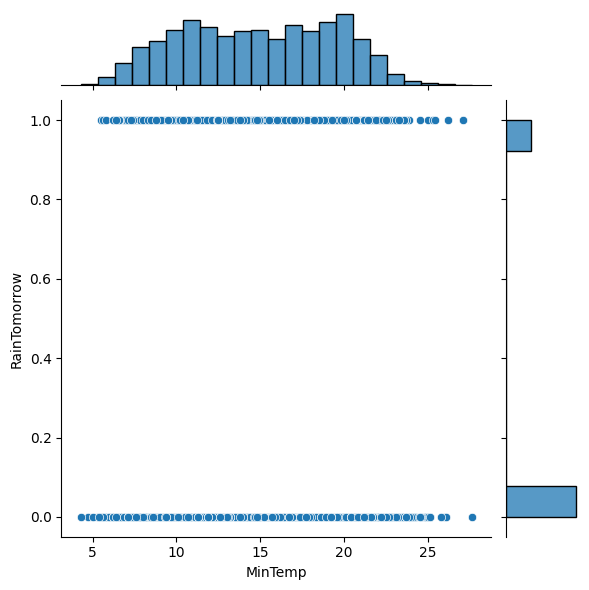

In [28]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.MinTemp, y=df.RainTomorrow)

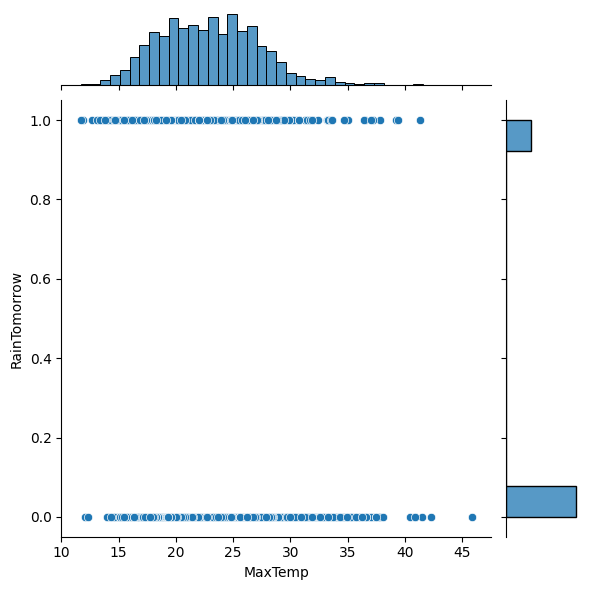

In [29]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.MaxTemp, y=df.RainTomorrow)

Missing Value Imputation

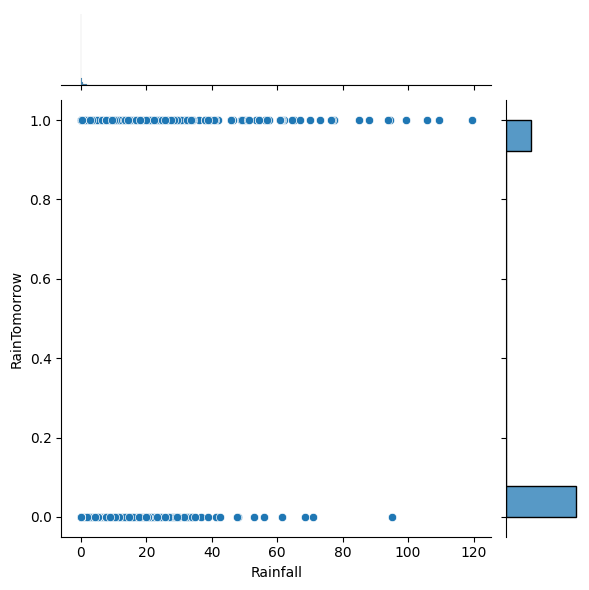

In [30]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Rainfall, y=df.RainTomorrow)

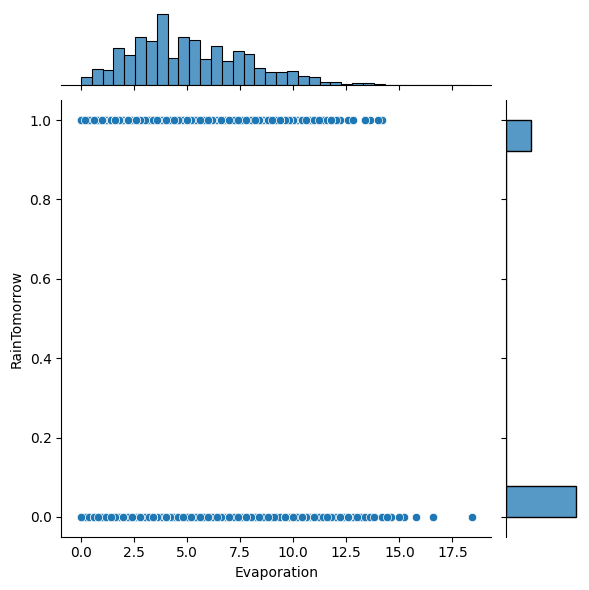

In [31]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Evaporation, y=df.RainTomorrow)

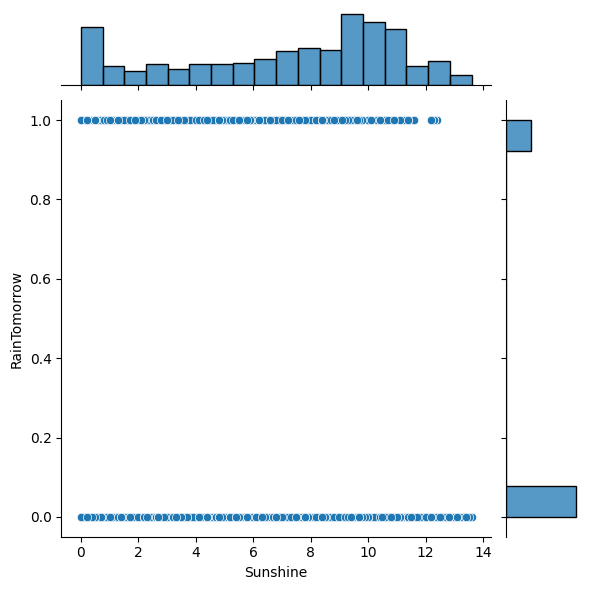

In [32]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Sunshine, y=df.RainTomorrow)

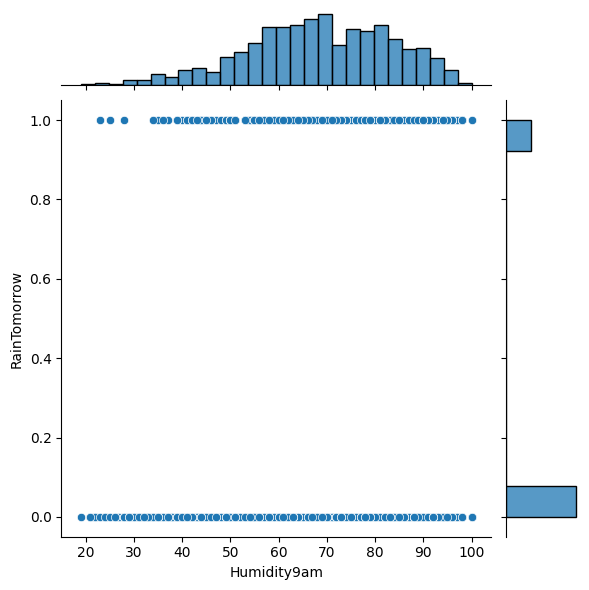

In [33]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Humidity9am, y=df.RainTomorrow)

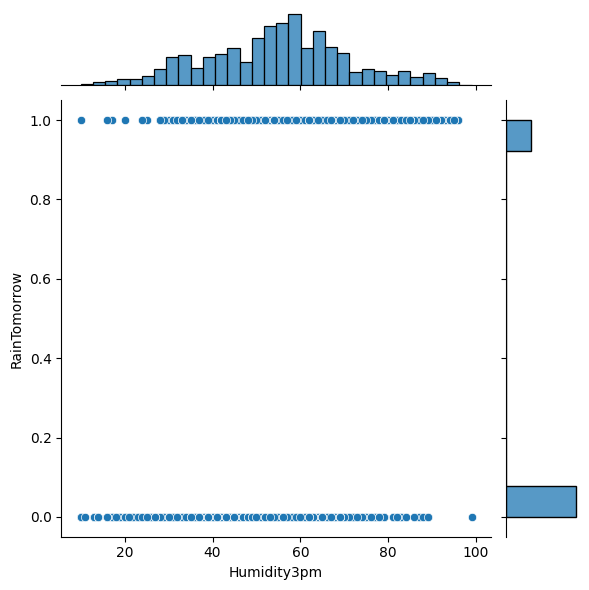

In [34]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Humidity3pm, y=df.RainTomorrow)

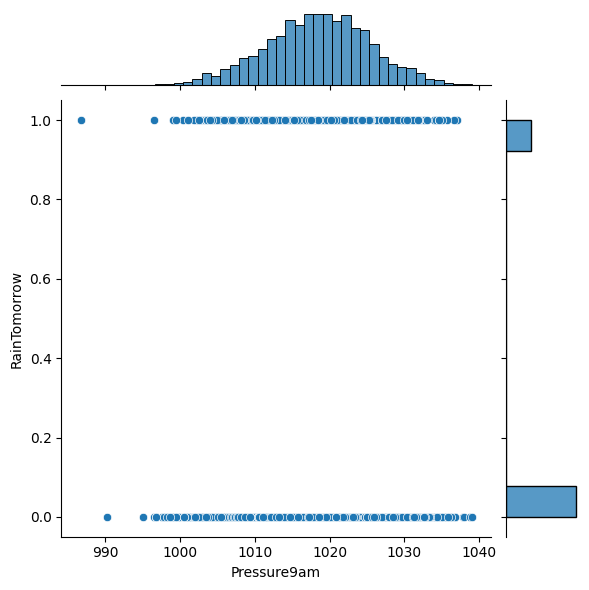

In [35]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Pressure9am, y=df.RainTomorrow)

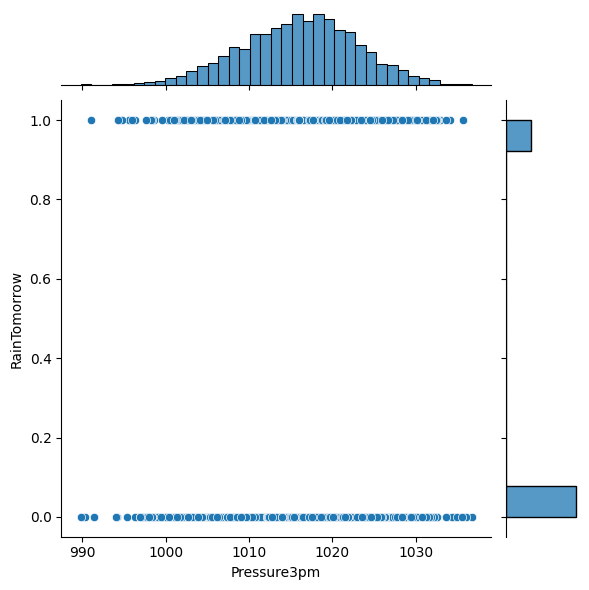

In [36]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Pressure3pm, y=df.RainTomorrow)

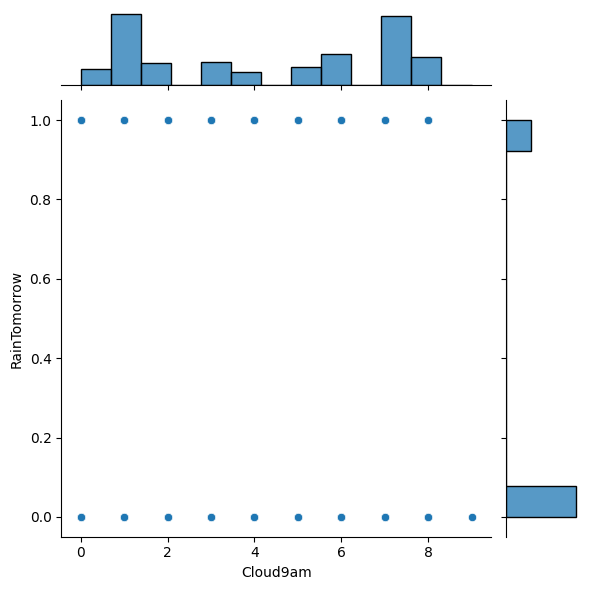

In [37]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Cloud9am, y=df.RainTomorrow)

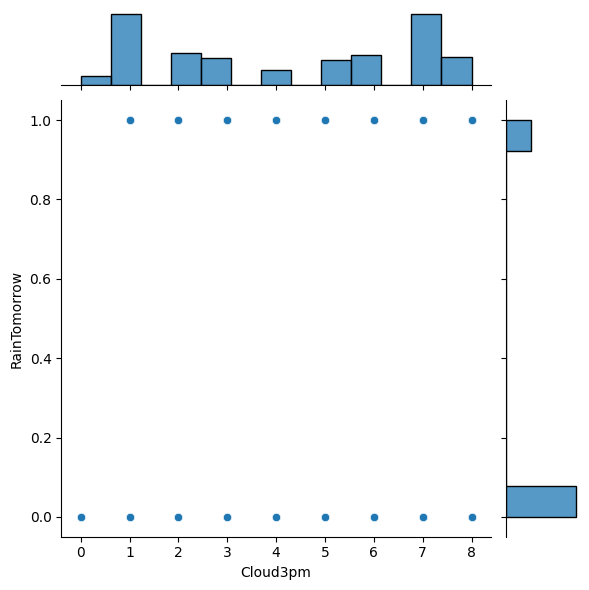

In [38]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Cloud3pm, y=df.RainTomorrow)

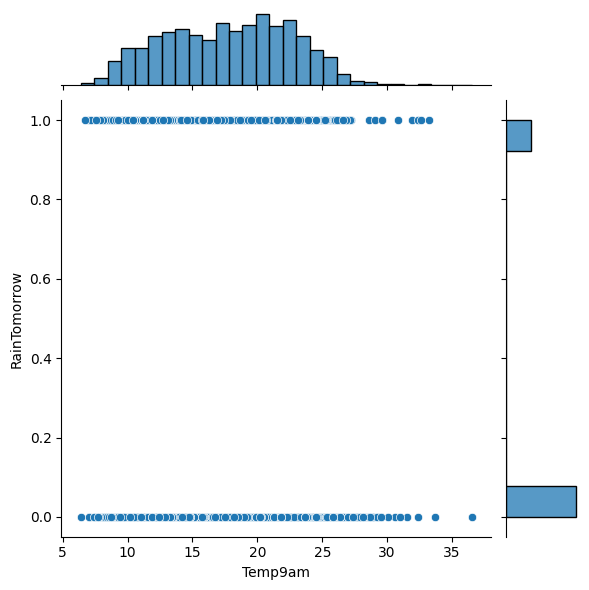

In [39]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Temp9am, y=df.RainTomorrow)

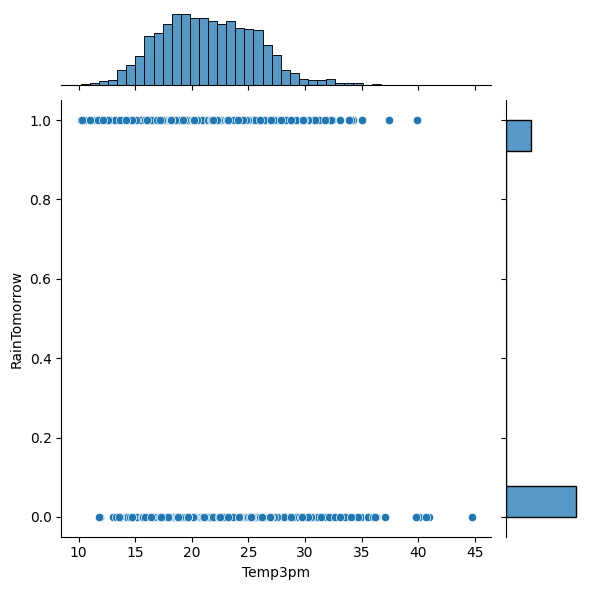

In [40]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.Temp3pm, y=df.RainTomorrow)

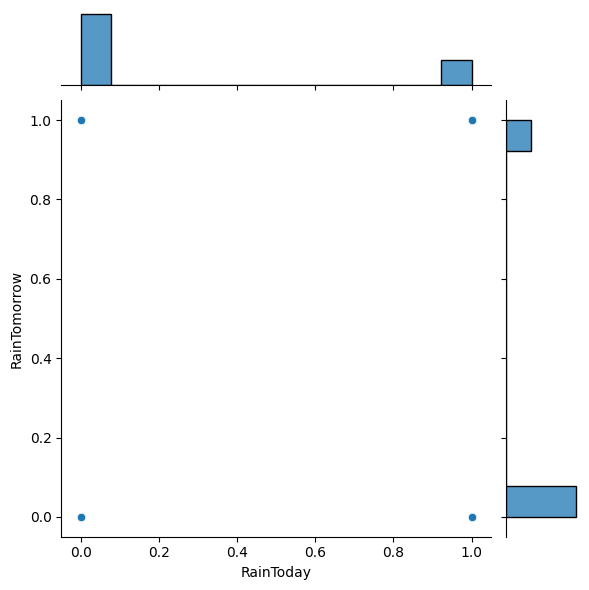

In [41]:
####Jointplot of x variable with rainTOmorrow
sns.jointplot(x=df.RainToday, y=df.RainTomorrow)

In [42]:
###creating mode
a=df.RainToday.mode()

In [43]:
###Printing variable a
print(a)

0    0.0
Name: RainToday, dtype: float64


In [44]:
###Replacing missing values by mean ,median and mode.
df.MinTemp= df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp= df.MaxTemp.fillna(df.MaxTemp.median())
df.Rainfall= df.Rainfall.fillna(df.Rainfall.median())
df.Evaporation= df.Evaporation.fillna(df.Evaporation.median())
df.Sunshine= df.Sunshine.fillna(df.Sunshine.median())
df.Humidity9am= df.Humidity9am.fillna(df.Humidity9am.median())
df.Humidity3pm= df.Humidity3pm.fillna(df.Humidity3pm.median())
df.Pressure9am= df.Pressure9am.fillna(df.Pressure9am.median())
df.Pressure3pm= df.Pressure3pm.fillna(df.Pressure3pm.median())
df.Cloud9am= df.Cloud9am.fillna(df.Cloud9am.median())
df.Cloud3pm= df.Cloud3pm.fillna(df.Cloud3pm.median())
df.Temp9am= df.Temp9am.fillna(df.Temp9am.median())
df.Temp3pm= df.Temp3pm.fillna(df.Temp3pm.median())



In [45]:
###filling missing value
df.RainToday=df.RainToday.fillna(a[0])

In [46]:
###Getting information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3337 non-null   float64
 1   MaxTemp       3337 non-null   float64
 2   Rainfall      3337 non-null   float64
 3   Evaporation   3337 non-null   float64
 4   Sunshine      3337 non-null   float64
 5   Humidity9am   3337 non-null   float64
 6   Humidity3pm   3337 non-null   float64
 7   Pressure9am   3337 non-null   float64
 8   Pressure3pm   3337 non-null   float64
 9   Cloud9am      3337 non-null   float64
 10  Cloud3pm      3337 non-null   float64
 11  Temp9am       3337 non-null   float64
 12  Temp3pm       3337 non-null   float64
 13  RainToday     3337 non-null   float64
 14  RainTomorrow  3337 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 391.2 KB


#### Outlier Treatment

In [47]:
###Getting extended dictionary of data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002218,3.324243,5.181510,7.184747,68.232245,54.704225,1018.347678,1016.020375,4.320348,4.181900,17.820198,21.533054,0.259515,0.259215
std,4.551593,4.493293,9.887277,2.756505,3.802525,15.053751,16.261954,7.000519,7.012189,2.524256,2.410918,4.894258,4.301163,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


In [48]:
###Getting percentile of variable
np.percentile(df.MinTemp,[99])[0]

23.5

In [49]:
###Getting percentile of variable
np.percentile(df.MinTemp,[1])[0]

6.2

In [50]:
###Getting percentile of variable
np.percentile(df.MaxTemp,[99])[0]

35.52799999999998

In [51]:
###Getting percentile of variable
np.percentile(df.MaxTemp,[1])[0]

14.4

In [52]:
###Getting percentile of variable
np.percentile(df.Rainfall,[99])[0]

52.29599999999982

In [53]:
###Getting percentile of variable
np.percentile(df.Rainfall,[1])[0]

0.0

In [54]:
###Getting percentile of variable
np.percentile(df.Evaporation,[99])[0]

12.8

In [55]:
###Getting percentile of variable
np.percentile(df.Evaporation,[1])[0]

0.4

In [56]:
###Getting percentile of variable
np.percentile(df.Sunshine,[99])[0]

13.0

In [57]:
###Getting percentile of variable
np.percentile(df.Sunshine,[1])[0]

0.0

In [58]:
###Getting percentile of variable
np.percentile(df.Humidity9am,[99])[0]

96.0

In [59]:
###Getting percentile of variable
np.percentile(df.Humidity9am,[1])[0]

30.0

In [60]:
###Getting percentile of variable
np.percentile(df.Humidity3pm,[99])[0]

92.0

In [61]:
###Getting percentile of variable
np.percentile(df.Humidity3pm,[1])[0]

18.0

In [62]:
###Getting percentile of variable
np.percentile(df.Pressure9am,[99])[0]

1033.856

In [63]:
###Getting percentile of variable
np.percentile(df.Pressure9am,[1])[0]

1001.572

In [64]:
###Getting percentile of variable
np.percentile(df.Pressure3pm,[99])[0]

1031.664

In [65]:
###Getting percentile of variable
np.percentile(df.Pressure3pm,[1])[0]

998.972

In [66]:
###Getting percentile of variable
np.percentile(df.Cloud9am,[99])[0]

8.0

In [67]:
###Getting percentile of variable
np.percentile(df.Cloud9am,[1])[0]

0.0

In [68]:
###Getting percentile of variable
np.percentile(df.Cloud3pm,[99])[0]

8.0

In [69]:
###Getting percentile of variable
np.percentile(df.Cloud3pm,[1])[0]

0.0

In [70]:
###Getting percentile of variable
np.percentile(df.Temp9am,[99])[0]

27.863999999999987

In [71]:
###Getting percentile of variable
np.percentile(df.Temp9am,[1])[0]

8.5

In [72]:
###Getting percentile of variable
np.percentile(df.Temp3pm,[99])[0]

32.76399999999999

In [73]:
###Getting percentile of variable
np.percentile(df.Temp3pm,[1])[0]

13.1

In [74]:
###Getting percentile of variable
np.percentile(df.RainToday,[99])[0]

1.0

In [75]:
###Getting percentile of variable
np.percentile(df.RainToday,[1])[0]

0.0

In [76]:
###Findinding duplicate values
df1 = df[df.duplicated()]
print(len(df1))

0


### All The Preprocessing Operations Performed Till Now:
     a.Data file loaded
     b.Two unuseful fields 'Location' and 'Date'deleted
     c.After applying EDD found missing values
     d.Firsty missing values were treated because percentile value is non always
     e.Mean,Median and mode were used for treating missing values
     f.Outliers were found by Graph,percentile and EDD.seems sometime rare value but no big outliers like upper value 3 times of
     99 percentile and lower value 0.3 of 1 percentile.

### Creating variables and Test-Train Split

In [77]:
###creating dependent variable 'y' and independent variable 'x'
x=df.loc[:, df.columns!="RainTomorrow"]
y=df["RainTomorrow"]

In [78]:
###getting shape of x-y variable
print(x.shape,y.shape)

(3337, 14) (3337,)


In [79]:
###spliting x and y variables in 80:20 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [80]:
### number of rows and columns in test-train data set
print(x_train.shape, x_test.shape,y_train.shape, y_test.shape)

(2669, 14) (668, 14) (2669,) (668,)


### Model Creation:

### 1.Simple Classification Tree

In [81]:
### importing tree from sklearn library
from sklearn import tree

In [82]:
###creating object of decision tree classifier
clf_tree=tree.DecisionTreeClassifier(max_depth=3)

In [83]:
### fitting x_train and y_train on object of classifier
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [84]:
### predicting y_train and y_test variable
y_train_pred=clf_tree.predict(x_train)
y_test_pred=clf_tree.predict(x_test)

In [85]:
### importing recall,precision,accuracy and confusion matrix from sklearn library
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score,confusion_matrix

In [86]:
### creating confusion matrix of y_test and y_test_pred variables
confusion_matrix(y_test,y_test_pred)

array([[460,  50],
       [ 75,  83]])

In [87]:
### finding precision score of y_test and y_test_pred
precision_score(y_test,y_test_pred)

0.6240601503759399

In [88]:
### finding recall score of y_test and y_test_pred
recall_score(y_test,y_test_pred)

0.5253164556962026

In [89]:
### finding roc_auc score of y_test and y_test_pred
roc_auc_score(y_test,y_test_pred)

0.7136386200049641

In [90]:
### finding accuracy score of y_test and y_test_pred
accuracy_score(y_test,y_test_pred)

0.812874251497006

In [91]:
### finding accuracy score of y_train and y_train_pred
accuracy_score(y_train,y_train_pred)

0.8261521168977145

### 2.Bagging classification Tree

In [92]:
###importing bagging from sklearn library
from sklearn.ensemble import BaggingClassifier

In [93]:
### creating object of decision tree classifier
clf_tree= tree.DecisionTreeClassifier()

In [94]:
### creating object of bagging classifier
clf_bag_tree=BaggingClassifier(base_estimator=clf_tree, n_estimators=10, bootstrap=True, n_jobs=-1, random_state=0)

In [95]:
### fitting x_train and y_train on bagging classifier object
clf_bag_tree.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_jobs=-1,
                  random_state=0)

In [96]:
###predicting y_train and y_test variables
y_train_pred=clf_bag_tree.predict(x_train)
y_test_pred=clf_bag_tree.predict(x_test)

In [97]:
### creating confusin matrix of y_test and y_test_pred
confusion_matrix(y_test,y_test_pred)

array([[475,  35],
       [ 84,  74]])

In [98]:
### finding precision score of y_test and y_test_pred
precision_score(y_test,y_test_pred)

0.6788990825688074

In [99]:
###finding recall score of y_test and y_test_pred
recall_score(y_test,y_test_pred)

0.46835443037974683

In [100]:
###finding roc_auc score of y_test and y_test_pred
roc_auc_score(y_test,y_test_pred)

0.6998634896996774

In [101]:
###finding accuracy score of y_test and y_test_pred
accuracy_score(y_test,y_test_pred)

0.8218562874251497

In [102]:
### finding accuracy score of y_train and y_train_pred
accuracy_score(y_train,y_train_pred)

0.9797677032596478

### 3.Random Forest Classifier

In [103]:
### importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [104]:
###creating object of random forest classifier
rf_clf=RandomForestClassifier(n_estimators=10, n_jobs=-1,random_state=0)

In [105]:
###fitting x_train and y_train on randomclassifier object
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=0)

In [106]:
###predicting y_train and y_test variables
y_train_pred=rf_clf.predict(x_train)
y_test_pred=rf_clf.predict(x_test)

In [107]:
###creating confusion matrix of y_test and y_test_pred
confusion_matrix(y_test,y_test_pred)

array([[482,  28],
       [ 85,  73]])

In [108]:
###finding precision score of y_test and y_test_pred
precision_score(y_test,y_test_pred)

0.7227722772277227

In [109]:
###finding recall score of y_test and y_test_pred
recall_score(y_test,y_test_pred)

0.4620253164556962

In [110]:
###finding roc_auc score of y_test and y_test_pred
roc_auc_score(y_test,y_test_pred)

0.7035616778356912

In [111]:
###finding accuracy score of y_test and y_test_pred
accuracy_score(y_test,y_test_pred)

0.8308383233532934

In [112]:
### finding accuracy score of y_train and y_train_pred
accuracy_score(y_train,y_train_pred)

0.9801423754215062

### 4.Gradient_boosting

In [113]:
###importing gradient boosting classifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
###creating gradient boosting classifier object
gb_clf=GradientBoostingClassifier(random_state=0)

In [115]:
### fitting x_train and y_train on gradient boosting classifier object
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [116]:
###predicting y_train and y_test variables
y_train_pred= gb_clf.predict(x_train)
y_test_pred= gb_clf.predict(x_test)

In [117]:
###creating confusion matrix from y_test and y_test_pred
confusion_matrix(y_test,y_test_pred)

array([[483,  27],
       [ 78,  80]])

In [118]:
### finding precision score of y_test and y_test_pred
precision_score(y_test,y_test_pred)

0.7476635514018691

In [119]:
###finding recall score of y_test and y_test_pred
recall_score(y_test,y_test_pred)

0.5063291139240507

In [120]:
### finding roc_auc score of y_test and y_test_pred
roc_auc_score(y_test,y_test_pred)

0.7266939687267312

In [121]:
### finding accuracy score of y_test and y_test_pred
accuracy_score(y_test,y_test_pred)

0.842814371257485

In [122]:
### finding accuracy score of y_train and y_train_pred
accuracy_score(y_train,y_train_pred)

0.8782315473960285

### 5.Ada Boosting

In [123]:
###importing Ada boost classifier from sklearn
from sklearn.ensemble import AdaBoostClassifier

In [124]:
### creating object of adaboost classifier
ada_clf=AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=0)

In [125]:
###fitting x_train and y_train on ada boost classifier object
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=10, random_state=0)

In [126]:
###creating confusion matrix of y_test and x_test
confusion_matrix(y_test,ada_clf.predict(x_test))

array([[492,  18],
       [ 89,  69]])

In [127]:
### finding precision score of y_test and x_test
precision_score(y_test,ada_clf.predict(x_test))

0.7931034482758621

In [128]:
### finding recall score of y_test and x_test
recall_score(y_test,ada_clf.predict(x_test))

0.43670886075949367

In [129]:
### finding roc_auc score of y_test and x_test
roc_auc_score(y_test,ada_clf.predict(x_test))

0.7007073715562175

In [130]:
###finding accuracy score of y_test and x_test
accuracy_score(y_test,ada_clf.predict(x_test))

0.8398203592814372

In [131]:
###finding accuracy score of y_train and x_train
accuracy_score(y_train,ada_clf.predict(x_train))

0.8332708879730236

### 5.b Ada boost with Random forest

In [132]:
### creating randomforest classifier object
rf_cl2=RandomForestClassifier(random_state=0)

In [133]:
### creating ada boost classifier object
ada_clf2=AdaBoostClassifier(rf_cl2,learning_rate=0.05,n_estimators=10,random_state=0)

In [134]:
### fitting x_train and y_train variables on adaboost classifier object with randomforest object
ada_clf2.fit(x_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(random_state=0),
                   learning_rate=0.05, n_estimators=10, random_state=0)

In [135]:
### creating confusion matrix of y_test and x_test
confusion_matrix(y_test,ada_clf2.predict(x_test))

array([[484,  26],
       [ 77,  81]])

In [136]:
### finding precision score of y_test and x_test
precision_score(y_test,ada_clf2.predict(x_test))

0.7570093457943925

In [137]:
### finding recall score of y_test and x_test
recall_score(y_test,ada_clf2.predict(x_test))

0.5126582278481012

In [138]:
### finding roc_auc score of y_test and x_test
roc_auc_score(y_test,ada_clf2.predict(x_test))

0.7308389178456193

In [139]:
### finding accuracy score of y_test and x_test
accuracy_score(y_test,ada_clf2.predict(x_test))

0.8458083832335329

In [140]:
###finding accuracy score of y_train and x_train
accuracy_score(y_train,ada_clf2.predict(x_train))

1.0

### 6.K-Nearest Neighbours Classifier

In [141]:
### importing preprocessing from sklearn
from sklearn import preprocessing

In [142]:
### creating scaler object from x_train
scaler=preprocessing.StandardScaler().fit(x_train)

In [143]:
### standardizing x_train variable
x_train_s=scaler.transform(x_train)

In [144]:
### creating scaler object for x_test
scaler=preprocessing.StandardScaler().fit(x_test)

In [145]:
#### standardizing x_test variable
x_test_s=scaler.transform(x_test)

In [146]:
#### shape of standardize x_train and x_test
print(x_train_s.shape,x_test_s.shape)

(2669, 14) (668, 14)


In [147]:
###importing kneighbor classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [148]:
### creating kneighborclassifier object
clf_knn=KNeighborsClassifier(n_neighbors=4)

In [149]:
###fitting x_train_s and y_train on KNeighborsClassifier
clf_knn.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=4)

In [150]:
### creating confusion matrix of y_test and x_test_s
confusion_matrix(y_test,clf_knn.predict(x_test_s))

array([[483,  27],
       [ 88,  70]])

In [151]:
###finding recall score of y_test and x_test_s
recall_score(y_test,clf_knn.predict(x_test_s))

0.4430379746835443

In [152]:
### finding precision score of y_test and x_test_s
precision_score(y_test,clf_knn.predict(x_test_s))

0.7216494845360825

In [153]:
###finding roc_auc score of y_test and x_test_s
roc_auc_score(y_test,clf_knn.predict(x_test_s))

0.695048399106478

In [154]:
### finding accuracy score of y_test and x_test_s
accuracy_score(y_test,clf_knn.predict(x_test_s))

0.8278443113772455

In [155]:
###finding accuracy score of y_train and x_train
accuracy_score(y_train,clf_knn.predict(x_train_s))

0.8550018733608092

### 7.Linear Discriminant Analysis Classifier

In [156]:
### importing lineardiscriminantanalysis from sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [157]:
### creating object of lineardiscriminant ananlysis
clf_lda=LinearDiscriminantAnalysis()

In [158]:
### fitting x_train and y_train variables on lineardiscriminant analysis object
clf_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [159]:
### creating confusion matrix of y_test and x_test
confusion_matrix(y_test,clf_lda.predict(x_test))

array([[468,  42],
       [ 68,  90]])

In [160]:
### finding recall score of y_test and x_test
recall_score(y_test,clf_lda.predict(x_test))

0.569620253164557

In [161]:
### finding precision score of y_test and x_test
precision_score(y_test,clf_lda.predict(x_test))

0.6818181818181818

In [162]:
### finding roc_auc score of y_test and x_test
roc_auc_score(y_test,clf_lda.predict(x_test))

0.7436336559940431

In [163]:
### finding accuracy score of y_test and x_test
accuracy_score(y_test,clf_lda.predict(x_test))

0.8353293413173652

In [164]:
### finding accuracy score of y_train and x_train
accuracy_score(y_train,clf_lda.predict(x_train))

0.8298988385162982

### 8.Logistic Regression

In [165]:
### importing logisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [166]:
###creating object of logistic regression
clf_lrs=LogisticRegression()

In [167]:
#### fitting x_train and y_train on logistic regression object
clf_lrs.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [168]:
#### logistic regression classifier coefficient from model
clf_lrs.coef_

array([[-0.12181945,  0.09221371,  0.03451726,  0.01778918, -0.20121329,
         0.00307201,  0.05112136, -0.06010036,  0.05589326, -0.05606626,
         0.19755083,  0.03880424, -0.02132792,  0.05806394]])

In [169]:
###logisticregressionclassifier intercept from model
clf_lrs.intercept_

array([0.00069553])

setsmodel using

In [170]:
###importing statsmodels
import statsmodels.api as sn

In [171]:
### adding constant to x_train variable
x_train_const=sn.add_constant(x_train)

In [172]:
###first five records of x_train_constant variable
x_train_const.head()

,const,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
245,1.0,22.5,34.8,0.0,8.6,9.8,41.0,20.0,1014.8,1010.300,1.0,7.0,29.6,33.9,0.0
2258,1.0,6.6,21.3,0.0,2.6,9.4,49.0,22.0,1007.6,999.600,0.0,1.0,11.9,20.7,0.0
242,1.0,11.9,19.2,0.8,6.4,11.1,61.0,48.0,1020.3,1016.777,2.0,1.0,16.5,19.0,0.0
2747,1.0,17.7,20.1,18.2,9.0,0.0,81.0,70.0,1014.4,1013.400,8.0,8.0,18.7,18.9,1.0
2982,1.0,9.5,17.7,0.2,4.4,4.8,54.0,47.0,1004.0,1003.000,6.0,6.0,12.9,15.9,0.0


In [173]:
### importing statsmodels
import statsmodels.discrete.discrete_model as sm

In [174]:
###fitting y_train and x_train variables on logistic_regression_classifier
logit= sm.Logit(y_train, x_train_const).fit()

Optimization terminated successfully.
         Current function value: 0.385123
         Iterations 7


In [175]:
###summary of logistic regression classifier model
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                 2669
Model:                          Logit   Df Residuals:                     2654
Method:                           MLE   Df Model:                           14
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.3338
Time:                        15:38:30   Log-Likelihood:                -1027.9
converged:                       True   LL-Null:                       -1543.0
Covariance Type:            nonrobust   LLR p-value:                5.225e-211
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          29.6866      9.523      3.117      0.002      11.021      48.352
MinTemp        -0.2795      0.054     -5.189      0.000      -0.385      -0.174
MaxTemp         0.0732      0.047      1.549      0.121      -0.019       0.166
Rainfall        0.0102      0.008      1.353      0.176      -0.005       0.025
Evaporation     0.0610      0.028      2.165      0.030       0.006       0.116
Sunshine       -0.2187      0.025     -8.618      0.000      -0.268      -0.169
Humidity9am     0.0145      0.008      1.889      0.059      -0.001       0.030
Humidity3pm     0.0490      0.008      6.488      0.000       0.034       0.064
Pressure9am    -0.1105      0.034     -3.212      0.001      -0.178      -0.043
Pressure3pm     0.0768      0.033      2.310      0.021       0.012       0.142
Cloud9am       -0.0363      0.034     -1.069      0.285      -0.103       0.030
Cloud3pm        0.1480      0.034      4.328      0.000       0.081       0.215
Temp9am         0.1800      0.057      3.143      0.002       0.068       0.292
Temp3pm        -0.0281      0.056     -0.505      0.614      -0.137       0.081
RainToday       0.7216      0.153      4.729      0.000       0.423       1.021
===============================================================================
"""

In [176]:
#### creating confusion matrix of y_test and x_test of logisticregression classifier
confusion_matrix(y_test,clf_lrs.predict(x_test))

array([[472,  38],
       [ 80,  78]])

In [177]:
###finding recall score of y_test and x_test
recall_score(y_test,clf_lrs.predict(x_test))

0.4936708860759494

In [178]:
### finding precision score y_test and x_test
precision_score(y_test,clf_lrs.predict(x_test))

0.6724137931034483

In [179]:
### finding roc_auc score of y_test and x_test of logisticregressionclassifier
roc_auc_score(y_test,clf_lrs.predict(x_test))

0.7095805410771904

In [180]:
### finding accuracy score of y_test and and x_test of logisticregressionclassifier
accuracy_score(y_test,clf_lrs.predict(x_test))

0.8233532934131736

In [181]:
### finding accuracy score of y_train and and x_train of logisticregressionclassifier
accuracy_score(y_train,clf_lrs.predict(x_train))

0.8261521168977145

#### 9.XG Boost

In [182]:
### importing xgboost
import xgboost as xgb

In [183]:
###creating xgboost classifier object
xgb_clf=xgb.XGBClassifier(max_depth=5, n_estimators=10, learning_rate=0.2, n_jobs=-1,random_state=0)

In [184]:
### fitting x_train and y_train on xgboost classifier object
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [185]:
### creating confusion matrix of xgboost classifier
confusion_matrix(y_test, xgb_clf.predict(x_test))

array([[489,  21],
       [ 80,  78]])

In [186]:
### finding precision score of xgboost classifier
precision_score(y_test, xgb_clf.predict(x_test))

0.7878787878787878

In [187]:
### finding recall score of xgboost classifier
recall_score(y_test, xgb_clf.predict(x_test))

0.4936708860759494

In [188]:
### finding roc_auc score of xgboost classifier
roc_auc_score(y_test, xgb_clf.predict(x_test))

0.7262472077438571

In [189]:
### finding accuracy score of y_test and x_test of xgboost classifier
accuracy_score(y_test, xgb_clf.predict(x_test))

0.8488023952095808

In [190]:
### finding accuracy score of y_train and x_train of xgboost classifier
accuracy_score(y_train, xgb_clf.predict(x_train))

0.8666167103784189